# Import all Libraries

In [1]:
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
from sklearn.cluster import KMeans

import sklearn
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [3]:
df_data = pd.read_csv('TransformedDataset/transformed_user_summary_segemented_v2.csv')

In [4]:
df_data.head()

,msno,Monetary,Recency,Frequency,is_auto_renew,is_discount,BestPlan,active_days_per_month,total_usage_time_per_month,total_unique_songs_played_per_month,...,Percent_Songs_Played_100,is_churn,RecencyCluster,FrequencyCluster,MonetaryCluster,SongsPlayedFrequencyCluster,OverallScore,Segment,Plan,drop
0,187,1788,219,410,0,0,410,12,48210.151,364,...,23.739586,1,1,2,2,0,5,Mid-Value,Yearly,0
1,501,1788,263,410,0,0,410,12,50496.753,167,...,91.490592,1,1,2,2,0,5,Mid-Value,Yearly,0
2,2184,1788,239,410,0,0,410,14,36132.039,212,...,59.349542,1,1,2,2,0,5,Mid-Value,Yearly,0
3,3550,1788,210,410,0,0,410,13,42064.803,157,...,54.224399,1,1,2,2,0,5,Mid-Value,Yearly,0
4,4465,1788,278,410,0,0,410,18,65668.010,312,...,83.163338,1,1,2,2,0,5,Mid-Value,Yearly,0


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36403 entries, 0 to 36402
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   msno                                 36403 non-null  int64  
 1   Monetary                             36403 non-null  int64  
 2   Recency                              36403 non-null  int64  
 3   Frequency                            36403 non-null  int64  
 4   is_auto_renew                        36403 non-null  int64  
 5   is_discount                          36403 non-null  int64  
 6   BestPlan                             36403 non-null  int64  
 7   active_days_per_month                36403 non-null  int64  
 8   total_usage_time_per_month           36403 non-null  float64
 9   total_unique_songs_played_per_month  36403 non-null  int64  
 10  Percent_Songs_Played_25              36403 non-null  float64
 11  Percent_Songs_Played_50     

In [6]:
df_data.is_churn.mean()

0.23316759607724638

In [7]:
df_data['campaign_group'] = 'treatment'
df_data.loc[df_data.is_discount == 0, 'campaign_group'] = 'control'

In [8]:
df_data.head()

,msno,Monetary,Recency,Frequency,is_auto_renew,is_discount,BestPlan,active_days_per_month,total_usage_time_per_month,total_unique_songs_played_per_month,...,is_churn,RecencyCluster,FrequencyCluster,MonetaryCluster,SongsPlayedFrequencyCluster,OverallScore,Segment,Plan,drop,campaign_group
0,187,1788,219,410,0,0,410,12,48210.151,364,...,1,1,2,2,0,5,Mid-Value,Yearly,0,control
1,501,1788,263,410,0,0,410,12,50496.753,167,...,1,1,2,2,0,5,Mid-Value,Yearly,0,control
2,2184,1788,239,410,0,0,410,14,36132.039,212,...,1,1,2,2,0,5,Mid-Value,Yearly,0,control
3,3550,1788,210,410,0,0,410,13,42064.803,157,...,1,1,2,2,0,5,Mid-Value,Yearly,0,control
4,4465,1788,278,410,0,0,410,18,65668.010,312,...,1,1,2,2,0,5,Mid-Value,Yearly,0,control


In [9]:
df_data['target_class'] = 0 #CN
df_data.loc[(df_data.campaign_group == 'control') & (df_data.is_churn > 0),'target_class'] = 1 #CR
df_data.loc[(df_data.campaign_group == 'treatment') & (df_data.is_churn == 0),'target_class'] = 2 #TN
df_data.loc[(df_data.campaign_group == 'treatment') & (df_data.is_churn > 0),'target_class'] = 3 #TR

In [10]:
df_data['target_class'].unique()

array([1, 0, 2, 3], dtype=int64)

In [11]:
df_data.target_class.value_counts()

0    27790
1     8464
2      125
3       24
Name: target_class, dtype: int64

In [51]:
df_model = df_data.drop(['campaign_group','is_churn','is_discount'],axis=1)
df_model = pd.get_dummies(df_model)

In [52]:
df_model.head(10)

,msno,Monetary,Recency,Frequency,is_auto_renew,BestPlan,active_days_per_month,total_usage_time_per_month,total_unique_songs_played_per_month,Percent_Songs_Played_25,...,target_class,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,Plan_Daily,Plan_Monthly,Plan_Six Months,Plan_Three Months,Plan_Weekly,Plan_Yearly
0,187,1788,219,410,0,410,12,48210.151,364,38.219879,...,1,0,0,1,0,0,0,0,0,1
1,501,1788,263,410,0,410,12,50496.753,167,5.246362,...,1,0,0,1,0,0,0,0,0,1
2,2184,1788,239,410,0,410,14,36132.039,212,30.018644,...,1,0,0,1,0,0,0,0,0,1
3,3550,1788,210,410,0,410,13,42064.803,157,26.032263,...,1,0,0,1,0,0,0,0,0,1
4,4465,1788,278,410,0,410,18,65668.010,312,10.476203,...,1,0,0,1,0,0,0,0,0,1
5,4474,1788,240,410,0,410,3,9488.659,39,9.722222,...,1,0,0,1,0,0,0,0,0,1
6,5027,1788,162,410,0,410,2,91.000,2,100.000000,...,1,0,0,1,0,0,0,0,0,1
7,5435,1788,248,410,0,410,8,23966.653,53,9.632011,...,1,0,0,1,0,0,0,0,0,1
8,8659,1788,277,410,0,410,2,2200.417,9,5.555556,...,1,0,0,1,0,0,0,0,0,1
9,8883,1788,266,410,0,410,18,72730.116,74,6.236189,...,1,0,0,1,0,0,0,0,0,1


# Defining X and y Data

In [53]:
#create feature set and labels
X = df_model.drop(['target_class'],axis=1)
y = df_model.target_class

SMOTE Oversampling

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

([<matplotlib.patches.Wedge at 0x281976c2700>,
 [Text(0.7778174593052024, 0.7778174593052024, '1'),
  Text(-0.7778174593052023, 0.7778174593052024, '0'),
  Text(-0.7778174593052025, -0.7778174593052023, '2'),
  Text(0.7778174593052022, -0.7778174593052025, '3')],
 [Text(0.4242640687119285, 0.4242640687119285, '25.0%'),
  Text(-0.42426406871192845, 0.4242640687119285, '25.0%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.0%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.0%')])

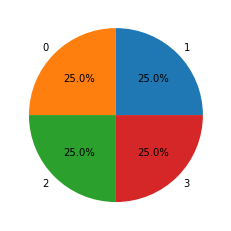

In [56]:
class_values=y.value_counts()
class_labels=y.unique().tolist()

plt.pie(class_values,labels=class_labels, radius =1,autopct='%1.1f%%' )

In [57]:
X.columns

Index(['msno', 'Monetary', 'Recency', 'Frequency', 'is_auto_renew', 'BestPlan',
       'active_days_per_month', 'total_usage_time_per_month',
       'total_unique_songs_played_per_month', 'Percent_Songs_Played_25',
       'Percent_Songs_Played_50', 'Percent_Songs_Played_100', 'RecencyCluster',
       'FrequencyCluster', 'MonetaryCluster', 'SongsPlayedFrequencyCluster',
       'OverallScore', 'drop', 'Segment_High-Value', 'Segment_Low-Value',
       'Segment_Mid-Value', 'Plan_Daily', 'Plan_Monthly', 'Plan_Six Months',
       'Plan_Three Months', 'Plan_Weekly', 'Plan_Yearly'],
      dtype='object')

Test Train Split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [59]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01,max_depth=7)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [61]:
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

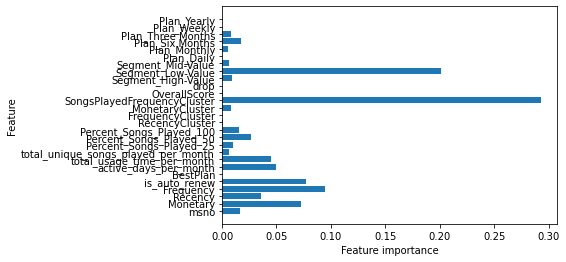

In [62]:
plot_feature_importances(xgb)

In [63]:
class_probs = xgb.predict_proba(X_test)

In [64]:
y_pred = xgb.predict(X_test)

In [66]:
print("Accuracy on training set: {:.3f}".format(xgb.score(X_train, y_train)))

print("XG Boost Accuracy on test set: {:.3f}".format(xgb.score(X_test, y_test)))

Accuracy on training set: 0.901
XG Boost Accuracy on test set: 0.899


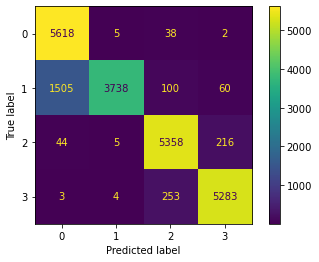

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Display confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()
plt.show()

In [68]:
class_probs[0]

array([0.5147334 , 0.22272494, 0.13130179, 0.13123989], dtype=float32)

In [69]:
X_test['proba_CN'] = class_probs[:,0] 
X_test['proba_CR'] = class_probs[:,1] 
X_test['proba_TN'] = class_probs[:,2] 
X_test['proba_TR'] = class_probs[:,3] 

In [70]:
X_test['uplift_score'] = X_test.eval('proba_CN + proba_TR - proba_TN - proba_CR')

In [71]:
X_test.head(20)

,msno,Monetary,Recency,Frequency,is_auto_renew,BestPlan,active_days_per_month,total_usage_time_per_month,total_unique_songs_played_per_month,Percent_Songs_Played_25,...,Plan_Monthly,Plan_Six Months,Plan_Three Months,Plan_Weekly,Plan_Yearly,proba_CN,proba_CR,proba_TN,proba_TR,uplift_score
1854,170,99,25,30,1,30,2,881.162000,9,41.666667,...,1,0,0,0,0,0.514733,0.222725,0.131302,0.131240,0.291947
31552,91213,149,23,30,1,30,9,5639.882000,23,11.851852,...,1,0,0,0,0,0.526623,0.231923,0.120755,0.120699,0.294642
36585,62515,114,20,30,0,30,1,12683.245932,82,7.934463,...,1,0,0,0,0,0.426660,0.299097,0.137154,0.137089,0.127498
109001,86266,9,5,30,1,30,16,59444.266752,296,30.503429,...,1,0,0,0,0,0.140757,0.140744,0.141994,0.576505,0.434525
23800,67599,99,17,30,1,30,15,58576.250000,274,13.601451,...,1,0,0,0,0,0.514733,0.222725,0.131302,0.131240,0.291947
91482,79647,137,12,121,1,30,26,197384.868572,523,16.656086,...,1,0,0,0,0,0.115457,0.117771,0.115349,0.651424,0.533760
12130,31877,149,12,30,1,30,7,14501.822000,52,29.724573,...,1,0,0,0,0,0.526623,0.231923,0.120755,0.120699,0.294642
76869,92406,74,1,95,1,30,4,17356.616012,56,20.834229,...,1,0,0,0,0,0.113732,0.113472,0.648546,0.124251,-0.524035
62211,26742,1629,2,399,1,30,11,33931.630664,167,17.368831,...,1,0,0,0,0,0.121203,0.122391,0.633641,0.122764,-0.512064
62950,34858,189,1,86,1,30,1,446.275392,2,5.941612,...,1,0,0,0,0,0.115291,0.118442,0.647459,0.118808,-0.531802


### Exporting Results

In [80]:
dataToPredict = df_data

In [81]:
result = pd.DataFrame()

In [82]:
result['msno']=dataToPredict['msno']

In [83]:
dataToPredict = dataToPredict.drop(['campaign_group','is_churn','target_class','is_discount'],axis=1)

In [84]:
dataToPredict = pd.get_dummies(dataToPredict)

In [85]:
result['Target'] = xgb.predict(dataToPredict)

In [86]:
class_probs = xgb.predict_proba(dataToPredict)

In [87]:
result['CN'] = class_probs[:,0] 
result['CR'] = class_probs[:,1] 
result['TN'] = class_probs[:,2] 
result['TR'] = class_probs[:,3] 

In [88]:
result['uplift_score'] = result.eval('CN + TR - TN - CR')

In [89]:
result.head()

,msno,Target,CN,CR,TN,TR,uplift_score
0,187,1,0.111599,0.648138,0.110409,0.129854,-0.517093
1,501,1,0.113499,0.659172,0.112289,0.115041,-0.542920
2,2184,1,0.113508,0.659224,0.112297,0.114970,-0.543043
3,3550,1,0.111599,0.648138,0.110409,0.129854,-0.517093
4,4465,1,0.108525,0.624826,0.107367,0.159283,-0.464385


In [90]:
result.shape

(36403, 7)

In [91]:
plan_result = pd.read_csv('ResultDataset/result_plan.csv')

In [92]:
plan_result.shape

(36338, 6)

In [93]:
result_plan_uplift = pd.merge(plan_result, result, on='msno', how='inner')

In [94]:
result_plan_uplift.shape

(36338, 12)

In [95]:
result_plan_uplift.to_csv('ResultDataset/result_plan_uplift.csv',index=False)